# Exercise 5 - Density map from a set of particles in 2D
## Dominik Wolf, Frayja Walberg, Hauke Lüdemann

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define grid parameters
H = 15
K = 30
M = 2.0
cellSize = 2.0 * H / K

In [4]:
def get_grid_indices(X):
    """ This function calculates the grid indices of a given particle.
    
    Args:
        X (np.array([x, y])): Position of the particle.
    Returns:
        np.array([k, l]): Indices of grid.
    """
    
    return np.floor((X + H) * K / (2 * H))

def grid_center(kl):
    """ This function returns the center of the grid cell.  
    
    Args:
        kl np.array([k,l]): Indices of cell.
    Returns:
        np.array([x,y]): Coordinates of the center of the cell
    """
    return kl - 14.5

In [5]:
def epsilon(X, kl):
    """ This function computes the distance to the side and the bottom of the grid cell
        the particle is located in.
    
    Args:
        X (np.array([x, y])): Position of the particle.
        kl (np.array([k,l])): Indices of grid cell.
    Returns:
        np.array([ex, ey]): Distance to the left side and the bottom of the grid cell.
    """
    
    return (X - (grid_center(kl) - 0.5 * cellSize)) / cellSize

In [6]:
def w_zeroth_order(X):
    """ This function computes the zeroth order stencil.
        This is just a 3x3 matrix with zeroes except for the element in the middle 
        which is 1.
    
     Args:
        X (np.array([x, y])): Position of the particle.
    Returns:
        np.array(3x3): Weights of the stencil.
    """
    
    W = np.zeros((3,3))
    W[1,1] = 1
    
    return W

def w_first_order(X, kl):
    """ This function computes the first order stencil.
        
     Args:
        X (np.array([x, y])): Position of the particle.
    Returns:
        np.array(3x3): Weights of the stencil.
    """
    
    center = grid_center(kl)
    W = np.zeros((3,3))
    ex, ey = epsilon(X, kl)
    
    ## Take python array index convention into account
    if center[0] < X[0] and center[1] < X[1]:
        W[2,1] = (1.5 - ex) * (ey - 0.5)
        W[2,2] = (ex - 0.5) * (ey - 0.5)
        W[1,1] = (1.5 - ex) * (1.5 - ey)
        W[1,2] = (ex - 0.5) * (1.5 - ey)
    elif center[0] > X[0] and center[1] < X[1]:
        W[2,0] = (0.5 - ex) * (ey - 0.5)
        W[2,1] = (0.5 + ex) * (ey - 0.5)
        W[1,0] = (0.5 - ex) * (1.5 - ey)
        W[1,1] = (0.5 + ex) * (1.5 - ey)
    elif center[0] < X[0] and center[1] > X[1]:
        W[1,1] = (1.5 - ex) * (0.5 + ey)
        W[1,2] = (ex - 0.5) * (0.5 + ey)
        W[0,1] = (1.5 - ex) * (0.5 - ey)
        W[0,2] = (ex - 0.5) * (0.5 - ey)
    elif center[0] > X[0] and center[1] > X[1]:
        W[1,0] = (0.5 - ex) * (0.5 + ey)
        W[1,1] = (0.5 + ex) * (0.5 + ey)
        W[0,0] = (0.5 - ex) * (0.5 - ey)
        W[0,1] = (0.5 + ex) * (0.5 - ey)
    return W

def w_second_order(X, kl):
    """ This function computes the second order stencil.
      
     Args:
        X (np.array([x, y])): Position of the particle.
        kl (np.array([k,l])): Indices of grid cell.
    Returns:
        np.array(3x3): Weights of the stencil.
    """
    
    ex, ey = epsilon(X, kl)
    
    W = np.ones((3,3))
    W[:,0]*=0.5-ex+0.5*ex**2
    W[:,1]*=0.5+ex-ex**2
    W[:,2]*=0.5*ex**2
    W[0,:]*=0.5-ey+0.5*ey**2
    W[1,:]*=0.5+ey-ey**2
    W[2,:]*=0.5*ey**2
    
    return W
    

### 1) Function that takes in the position of the particles and returns the indices of the cell as well as the W-matrix.

In [7]:
def particle_to_grid(X, order):
    """ This returns the grid indices and the W-matrix given a particle position.
    
    Args:
        X (np.array([x,y])): Position of the particle.
        order (int): Order of the W-matrix.
    Returns:
        np.array([k,l]): Indices of grid cell the particle is in.
        np.array(3x3): W-matrix of particle.
    """
    
    kl = get_grid_indices(X)
    
    if order == 0:
        W = w_zeroth_order(X)
    elif order == 1:
        W = w_first_order(X, kl)
    elif order == 2:
        W = w_second_order(X, kl)
        
    return kl, W       
        

### 2) Single particle in the grid

In [8]:
def get_random_particle():
    """ This function returns a random particle located in the grid.
        Note: The position is allways at least one cell from boundary away.
        
    Returns:
        np.array([x,y]): Random position.
    """
    
    return np.random.default_rng().uniform(-14,14,2)



In [9]:
def density_matrix(X, order):
    """ This function determines the densitiy matrix using W.
    
    Args:
        X (np.array(Nx2)): Positions of all particels.
        order (int): Order of the W-matrix
    Returns:
        np.array(30x30): Density matrix of the grid
    """
    
    N = len(X)
    denMatrix = np.zeros((30, 30))
    
    for i in range(0, N):
        
        kl, W = particle_to_grid(X[i,:], order)
        k = int(kl[0])
        l = int(kl[1])
        denMatrix[l-1:l+2, k-1:k+2] += W * M / N
        
    return denMatrix

#### Plot of the density matrix for one particel using the different orders of the W-matrix.

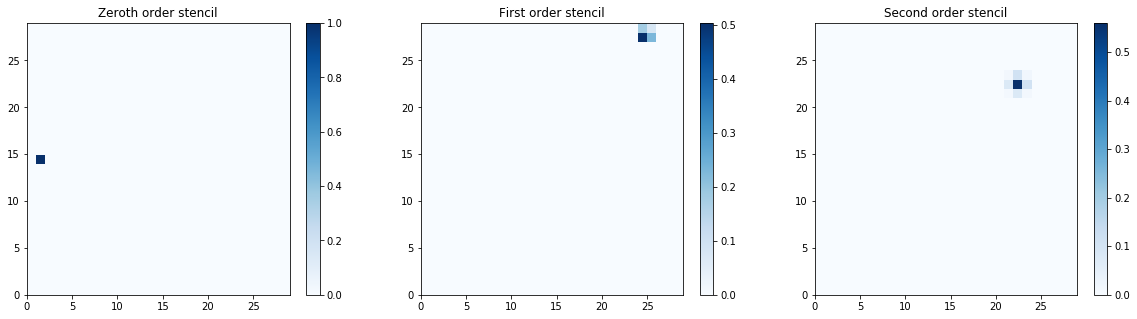

In [10]:
point = get_random_particle().reshape(1,2)
denMatrix0 = density_matrix(point, 0)/M
point = get_random_particle().reshape(1,2)
denMatrix1 = density_matrix(point, 1)/M
point = get_random_particle().reshape(1,2)
denMatrix2 = density_matrix(point, 2)/M


# Generate the k,l grid
y, x = np.meshgrid(np.linspace(0, K-1, K), np.linspace(0, K-1, K))

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

c0 = ax[0].pcolormesh(x, y, denMatrix0.T, cmap='Blues')
c1 = ax[1].pcolormesh(x, y, denMatrix1.T, cmap='Blues')
c2 = ax[2].pcolormesh(x, y, denMatrix2.T, cmap='Blues')

ax[0].set_title("Zeroth order stencil")
ax[1].set_title("First order stencil")
ax[2].set_title("Second order stencil")

# set the limits of the plot to the limits of the data
ax[0].axis([x.min(), x.max(), y.min(), y.max()])
ax[1].axis([x.min(), x.max(), y.min(), y.max()])
ax[2].axis([x.min(), x.max(), y.min(), y.max()])

fig.colorbar(c0, ax=ax[0])
fig.colorbar(c1, ax=ax[1])
fig.colorbar(c2, ax=ax[2])

plt.show()


### 3) 100 particels following a 2D gaussian distribution

In [11]:
## Get random points following a gaussian distribution

def gaussian_random_points(N, sigma):
    """ This function returns random points following a 2d gaussian distribution.
    """
    
    points = np.random.normal(0.0, sigma, 2).reshape(1,2)

    for _ in range(0, N - 1):
        p = np.random.normal(0.0, sigma, 2)

        if p[0] <= -14.0 or p[1] <= -14.0 or p[0] >= 14.0 or p[1] >= 14.0:
            continue
        else:
            points = np.append(points, [p], axis=0)

    return points

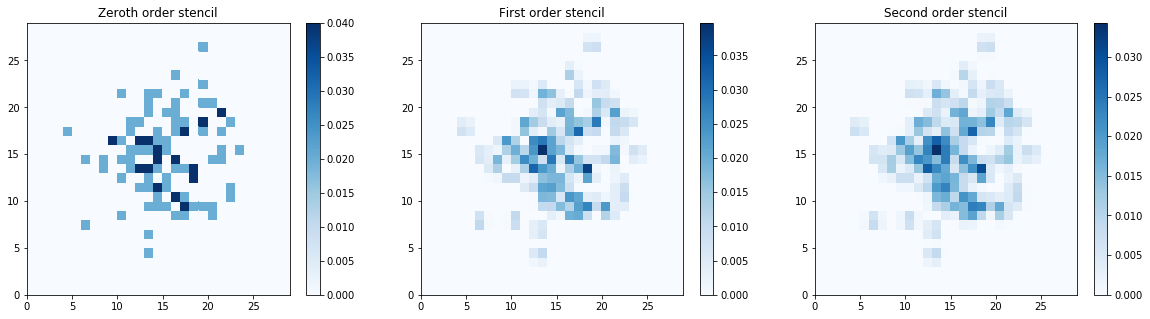

In [12]:
N = 100
sigma = 4.0

points = gaussian_random_points(N, sigma)

denMatrix0 = density_matrix(points, 0)
denMatrix1 = density_matrix(points, 1)
denMatrix2 = density_matrix(points, 2)


# Generate the k,l grid
y, x = np.meshgrid(np.linspace(0, K-1, K), np.linspace(0, K-1, K))

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

c0 = ax[0].pcolormesh(x, y, denMatrix0.T, cmap='Blues')
c1 = ax[1].pcolormesh(x, y, denMatrix1.T, cmap='Blues')
c2 = ax[2].pcolormesh(x, y, denMatrix2.T, cmap='Blues')

ax[0].set_title("Zeroth order stencil")
ax[1].set_title("First order stencil")
ax[2].set_title("Second order stencil")

# set the limits of the plot to the limits of the data
ax[0].axis([x.min(), x.max(), y.min(), y.max()])
ax[1].axis([x.min(), x.max(), y.min(), y.max()])
ax[2].axis([x.min(), x.max(), y.min(), y.max()])

fig.colorbar(c0, ax=ax[0])
fig.colorbar(c1, ax=ax[1])
fig.colorbar(c2, ax=ax[2])

plt.show()


It can be nicely seen that using a stencil of higher order smoothes the mass desnity distribution. 

### 4) 10000 particles in the grid

In [13]:
## Add 10000 particels to the grid

N = 10000
sigma = 4.0

points = gaussian_random_points(N, sigma)

denMatrix0 = density_matrix(points, 0)
denMatrix1 = density_matrix(points, 1)
denMatrix2 = density_matrix(points, 2)


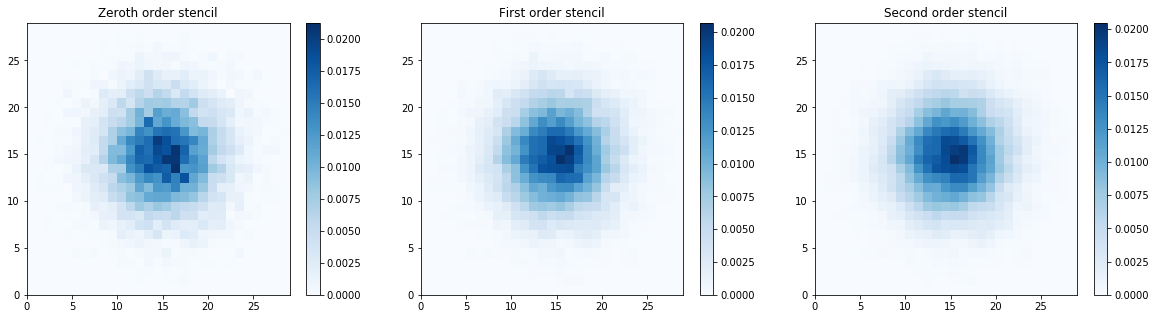

In [14]:
## Plot the density mtrices

y, x = np.meshgrid(np.linspace(0, K-1, K), np.linspace(0, K-1, K))

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

c0 = ax[0].pcolormesh(x, y, denMatrix0.T, cmap='Blues')
c1 = ax[1].pcolormesh(x, y, denMatrix1.T, cmap='Blues')
c2 = ax[2].pcolormesh(x, y, denMatrix2.T, cmap='Blues')

ax[0].set_title("Zeroth order stencil")
ax[1].set_title("First order stencil")
ax[2].set_title("Second order stencil")

# set the limits of the plot to the limits of the data
ax[0].axis([x.min(), x.max(), y.min(), y.max()])
ax[1].axis([x.min(), x.max(), y.min(), y.max()])
ax[2].axis([x.min(), x.max(), y.min(), y.max()])

fig.colorbar(c0, ax=ax[0])
fig.colorbar(c1, ax=ax[1])
fig.colorbar(c2, ax=ax[2])

plt.show()

Plotting the mass density distributions of 10000 particles using the different orders of stencils also illustrates that a higher order stencil smoothes the distribution.

In [15]:
## Sum up total mass to validate the reult

print("Zeroths order: ", np.sum(denMatrix0))
print("First order: ", np.sum(denMatrix1))
print("Second order: ", np.sum(denMatrix2))

Zeroths order:  1.9999999999999991
First order:  2.0
Second order:  2.0


The integral (sum) over the mass density function should give $M=2.0$. Slight differences can occure due to some particles that get rejected because they are outside of the grid.